In [75]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def inside_obstacle(point,obstacle):
    """
    returns 1 if the point is inside any obstacles
    0 otherwise
    """
    for obs in obstacle:
        if point[0]>obs[0][0] and point[0]<obs[0][2] and point[1]>obs[1][0] and point[1]<obs[1][2]:
            return 1
    return 0

def through_obstacle(line,obstacles):
    """
    returns 1 if the line goes through any obstacles
    0 otherwise
    """
    for i in range(10):
        if inside_obstacle((line[0]+(i*(line[2]-line[0])/10),line[1]+(i*(line[3]-line[1])/10)),obstacles)==1:
            return 1
    return 0

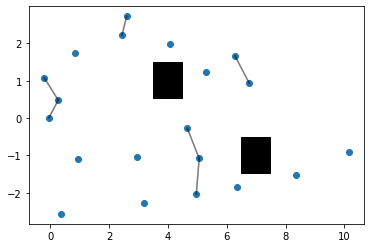

In [255]:
# ********************************************************************************* #
# LEARNING
# ********************************************************************************* #

# obstacle
obstacles=[[(3.5,4.5,4.5,3.5),(0.5,0.5,1.5,1.5)],
           [(6.5,7.5,7.5,6.5),(-1.5,-1.5,-0.5,-0.5)]]
xlimits=[-1,11]
ylimits=[-3,3]
for obs in obstacles:
    plt.fill(*obs,'k',alpha=1)

# samples
noofsamples=20
x=np.random.uniform(*xlimits,noofsamples)
y=np.random.uniform(*ylimits,noofsamples)
# x=(np.random.rand(200)*12)-1
# y=(np.random.rand(200)*6)-3

# eliminate samples inside obstacles
xindex=np.array([],dtype=int)
yindex=np.array([],dtype=int)
for i in range(len(x)):
    if inside_obstacle((x[i],y[i]),obstacles):
        xindex=np.append(xindex,i)
        yindex=np.append(yindex,i)
x=np.delete(x,xindex)
y=np.delete(y,yindex)

# plot
graph=[]
plt.scatter(x,y)
for i in range(len(x)):
    for j in range(len(y)):
        if np.sqrt((x[i]-x[j])**2+(y[i]-y[j])**2)<=1 and x[i]!=x[j] and y[i]!=y[j]:
            if through_obstacle((x[i],y[i],x[j],y[j]),obstacles)==0:
                plt.plot([x[i],x[j]],[y[i],y[j]],'k',alpha=0.3)
                graph.append([round(x[i],2),round(y[i],2),round(x[j],2),round(y[j],2)])
                pass
            pass

In [256]:
# graph[0][:2]
# graph[0][2:]

g_dict={}

for i in range(len(graph)):
    if str(graph[i][:2]) in g_dict.keys():
        g_dict[str(graph[i][:2])].append(str(graph[i][2:]))
        pass
    else:
        g_dict[str(graph[i][:2])]=[str(graph[i][2:])]


In [257]:
for key in g_dict.keys():
    g_dict[key]=[g_dict[key]]
    g_dict[key].append([1]*len(g_dict[key][0]))


In [258]:
g_dict

{'[6.28, 1.67]': [['[6.77, 0.93]'], [1]],
 '[5.06, -1.08]': [['[4.66, -0.27]', '[4.97, -2.03]'], [1, 1]],
 '[-0.2, 1.08]': [['[0.27, 0.48]'], [1]],
 '[0.27, 0.48]': [['[-0.2, 1.08]', '[-0.04, 0.01]'], [1, 1]],
 '[4.66, -0.27]': [['[5.06, -1.08]'], [1]],
 '[6.77, 0.93]': [['[6.28, 1.67]'], [1]],
 '[4.97, -2.03]': [['[5.06, -1.08]'], [1]],
 '[2.44, 2.22]': [['[2.6, 2.73]'], [1]],
 '[-0.04, 0.01]': [['[0.27, 0.48]'], [1]],
 '[2.6, 2.73]': [['[2.44, 2.22]'], [1]]}

In [11]:
# ********************************************************************************* #
# CREATE A GRAPH (UNDIRECTED)
# ********************************************************************************* #

# example
graph={"vstart" : [["A","B","C"],[1,1,1],0],
       "A" : [["D","E","F"],[1,1,3],3],
       "B" : [["G","H","I"],[4,1,2],2],
       "C" : [["J","K","L"],[1,1,1],3],
       "D" : [[],[],3],
       "E" : [["vgoal"],[3],1],
       "F" : [[],[],3],
       "G" : [["vgoal"],[3],2],
       "H" : [[],[],1],
       "I" : [["vgoal"],[3],2],
       "J" : [[],[],3],
       "K" : [["vgoal"],[2],2],
       "L" : [[],[],3],
       "vgoal" : [[],[],0]}



In [28]:
# graph.update({"L":graph["L"].append(3)})
graph["M"]=[7]
graph

{'vstart': [['A', 'B', 'C'], [1, 1, 1], 0],
 'A': [['D', 'E', 'F'], [1, 1, 3], 3],
 'B': [['G', 'H', 'I'], [4, 1, 2], 2],
 'C': [['J', 'K', 'L'], [1, 1, 1], 3],
 'D': [[], [], 3],
 'E': [['vgoal'], [3], 1],
 'F': [[], [], 3],
 'G': [['vgoal'], [3], 2],
 'H': [[], [], 1],
 'I': [7],
 'J': [[], [], 3],
 'K': [['vgoal'], [2], 2],
 'L': [3, 6, 6, 6, 6, 6],
 'vgoal': [[], [], 0],
 'M': [7]}

In [24]:
# ********************************************************************************* #
# APPLY DIJKSTRA'S
# ********************************************************************************* #

In [260]:
def pathcost(nodes):
    '''
    returns the path cost through the input nodes
    '''
    nodes.reverse()
    # print(nodes)
    length=0
    for i in range(len(nodes)-1):
        index=graph[nodes[i]][0].index(nodes[i+1])
        length=length+(graph[nodes[i]][1][index])
        pass
    return length

In [264]:
graph=g_dict
algo=int(input("\nWhich algorithm do you want to implement: a*(1) or dijkstra's(2)?"))

# starts with the start node
stack=[[0,'[4.97, -2.03]']]
C=[]
# update
final='[4.97, -2.03]'

t1=time.time()

iterations=0

while final!='[4.66, -0.27]' and len(C)<len(graph):

    # add child nodes
    newstack=[]
    # print([graph[stack[0][1]][0],graph[stack[0][1]][1]])
    for child,cost in np.transpose([graph[stack[0][1]][0],graph[stack[0][1]][1]]):
        path=pathcost([child,*stack[0][1:]])
        if algo==1:
            newelement=[path+int(graph[child][2]),child,*stack[0][1:]]
        else:
            newelement=[path,child,*stack[0][1:]]
        newstack.append(newelement)
    
    # put first node in C list
    if stack[0][1] not in C:
        C.append(stack[0][1])
        # print(C)

    # delete first node in stack
    stack.pop(0)

    # update the newstack with remaining stack elements
    for x in range(len(stack)):
        newstack.append(stack[x])
    stack=newstack

    # sort
    stack.sort()
    print(stack)
    final=stack[0][1]

    iterations+=1

    pass

t2=time.time()-t1
if final=='[4.66, -0.27]':
    if algo==1:
        print("\nPath for A* is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
    else:
        print("\nPath for Dijkstra's is:",stack[0][1:],"\nThe cost is:",stack[0][0],"\nThe time taken is:",t2,"\nIterations:",iterations)
else:
    print("\nPath to Goal not found!!!")

IndexError: list index out of range

In [70]:
g_dict[()]

KeyError: 0